# UC_Boulder Supervised Learning CSCA 5622 Final Project
This Codebase uses the dataset from https://www.kaggle.com/c/customer-churn-prediction-2020/data

## Project Title: 
Predicting Customer Churn Using Kaggle Data

## Background:
Customer churn, the loss of clients or customers, is a critical metric for businesses in subscription-based industries like telecom, or D2C business. Predicting likely churn for a specific customer can aid in implementing mitigations to retain them.

## Objective:
The Final project reuquires the creation of a supervised learning model. Here we will create predictions using Boosting model to predict customer churn based on historical data.

## Required Tasks Per Rubric:

#### Data Preprocessing: 
Clean the data, handle missing values, encode categorical variables, and scale numerical features if necessary.
#### Exploratory Data Analysis (EDA): 
Explore the dataset to gain insights into the relationship between features and churn. Visualize the data to understand patterns and correlations.
#### Feature Selection: 
Identify the most relevant features for predicting churn using techniques like feature importance or correlation analysis.
#### Model Selection: 
Experiment with different supervised learning algorithms such as Logistic Regression, Random Forest, Support Vector Machines (SVM), Gradient Boosting, etc.
#### Model Training: 
Split the data into training and testing sets. Train the selected models on the training data.
#### Model Evaluation: 
Evaluate the performance of each model using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC curve.
#### Hyperparameter Tuning: 
Fine-tune the hyperparameters of the best-performing model to improve its performance further.
#### Model Interpretation: 
Interpret the trained model to understand which features are most influential in predicting churn.

## Deliverables:
#### A Jupyter notebook showing:
*  Supervised learning problem description,
*  EDA procedure
*  Analysis (model building and training)
*  result,
*  Discussion/Conclusion.


# Code Start

In [96]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC









import warnings
warnings.filterwarnings("ignore")



# Load the Data and Visualize it

In [86]:
train_ = pd.read_csv('data/train.csv')
train_=train_.dropna() #get rid of all NA values



test_ = pd.read_csv('data/test.csv')
sample_test = pd.read_csv('data/sampleSubmission.csv')
y_train = train_.churn
y_test = sample_test.churn
print (y_train.info())
print (y_test.info())

X_train = train_.drop("churn", axis='columns')
X_train = X_train.drop('state', axis = 'columns') # Going to drop state for now to simplyfy numerical conversion.
X_train = X_train.drop('area_code', axis = 'columns') # Going to drop aread_code for now for the same reason as state.

X_test = test_.drop('id', axis='columns')
X_test = X_test.drop('state', axis = 'columns')
X_test = X_test.drop('area_code', axis = 'columns')

X_train.describe(include='all')

<class 'pandas.core.series.Series'>
RangeIndex: 4250 entries, 0 to 4249
Series name: churn
Non-Null Count  Dtype 
--------------  ----- 
4250 non-null   object
dtypes: object(1)
memory usage: 33.3+ KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 750 entries, 0 to 749
Series name: churn
Non-Null Count  Dtype 
--------------  ----- 
750 non-null    object
dtypes: object(1)
memory usage: 6.0+ KB
None


account_length international_plan voice_mail_plan  \
count      4250.000000               4250            4250   
unique             NaN                  2               2   
top                NaN                 no              no   
freq               NaN               3854            3138   
mean        100.236235                NaN             NaN   
std          39.698401                NaN             NaN   
min           1.000000                NaN             NaN   
25%          73.000000                NaN             NaN   
50%         100.000000                NaN             NaN   
75%         127.000000                NaN             NaN   
max         243.000000                NaN             NaN   

        number_vmail_messages  total_day_minutes  total_day_calls  \
count             4250.000000        4250.000000      4250.000000   
unique                    NaN                NaN              NaN   
top                       NaN                NaN              NaN   
freq                      NaN                NaN              NaN   
mean                 7.631765         180.259600        99.907294   
std                 13.439882          54.012373        19.850817   
min                  0.000000           0.000000         0.000000   
25%                  0.000000         143.325000        87.000000   
50%                  0.000000         180.450000       100.000000   
75%                 16.000000         216.200000       113.000000   
max                 52.000000         351.500000       165.000000   

        total_day_charge  total_eve_minutes  total_eve_calls  \
count        4250.000000        4250.000000      4250.000000   
unique               NaN                NaN              NaN   
top                  NaN                NaN              NaN   
freq                 NaN                NaN              NaN   
mean           30.644682         200.173906       100.176471   
std             9.182096          50.249518        19.908591   
min             0.000000           0.000000         0.000000   
25%            24.365000         165.925000        87.000000   
50%            30.680000         200.700000       100.000000   
75%            36.750000         233.775000       114.000000   
max            59.760000         359.300000       170.000000   

        total_eve_charge  total_night_minutes  total_night_calls  \
count        4250.000000          4250.000000        4250.000000   
unique               NaN                  NaN                NaN   
top                  NaN                  NaN                NaN   
freq                 NaN                  NaN                NaN   
mean           17.015012           200.527882          99.839529   
std             4.271212            50.353548          20.093220   
min             0.000000             0.000000           0.000000   
25%            14.102500           167.225000          86.000000   
50%            17.060000           200.450000         100.000000   
75%            19.867500           234.700000         113.000000   
max            30.540000           395.000000         175.000000   

        total_night_charge  total_intl_minutes  total_intl_calls  \
count          4250.000000         4250.000000       4250.000000   
unique                 NaN                 NaN               NaN   
top                    NaN                 NaN               NaN   
freq                   NaN                 NaN               NaN   
mean              9.023892           10.256071          4.426353   
std               2.265922            2.760102          2.463069   
min               0.000000            0.000000          0.000000   
25%               7.522500            8.500000          3.000000   
50%               9.020000           10.300000          4.000000   
75%              10.560000           12.000000          6.000000   
max              17.770000           20.000000         20.000000   

        total_intl_charge  number_customer_

Lets make all DF columns numerical

In [87]:
X_train["international_plan"] = X_train["international_plan"].replace({'no': 0, 'yes': 1}).astype(int)
X_train["voice_mail_plan"] = X_train["voice_mail_plan"].replace({'no': 0, 'yes': 1}).astype(int)

X_test["international_plan"] = X_test["international_plan"].replace({'no': 0, 'yes': 1}).astype(int)
X_test["voice_mail_plan"] = X_test["voice_mail_plan"].replace({'no': 0, 'yes': 1}).astype(int)

y_train=y_train.replace({'no': 0, 'yes': 1}).astype(int)
y_test=y_test.replace({'no': 0, 'yes': 1}).astype(int)



## Lets look at the best predictors using R2

In [88]:
best_predictor=''
best_r_squared=0
best_degree=1
for column in X_train.columns:
    X = X_train[column]
    X = sm.add_constant(X)
    model = sm.OLS(y_train,X)
    results = model.fit()
    print (column, " : ", results.rsquared)
    if results.rsquared > best_r_squared:
        best_r_squared = results.rsquared
        best_predictor = column

print ('Best Predictor')
print (best_predictor, " : ", best_r_squared)

account_length  :  0.0003755258687084817
international_plan  :  0.06710840519674988
voice_mail_plan  :  0.013142920541966863
number_vmail_messages  :  0.010069425659328446
total_day_minutes  :  0.04634186224771397
total_day_calls  :  0.00013549942990087604
total_day_charge  :  0.0463382528093127
total_eve_minutes  :  0.006218145448970702
total_eve_calls  :  4.646707677635753e-05
total_eve_charge  :  0.006217577152196285
total_night_minutes  :  0.002175959647829351
total_night_calls  :  0.00016126598653498636
total_night_charge  :  0.00217538015430907
total_intl_minutes  :  0.003045471034964442
total_intl_calls  :  0.001178833694657322
total_intl_charge  :  0.0030444584723374746
number_customer_service_calls  :  0.0489384088035405
Best Predictor
international_plan  :  0.06710840519674988


#### Lets look at the Data to understand any obvious patterns

In [89]:
display(X_train)

account_length  international_plan  voice_mail_plan  \
0                107                   0                1   
1                137                   0                0   
2                 84                   1                0   
3                 75                   1                0   
4                121                   0                1   
...              ...                 ...              ...   
4245              83                   0                0   
4246              73                   0                0   
4247              75                   0                0   
4248              50                   0                1   
4249              86                   0                1   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26              161.6              123   
1                         0              243.4              114   
2                         0              299.4               71   
3                         0              166.7              113   
4                        24              218.2               88   
...                     ...                ...              ...   
4245                      0              188.3               70   
4246                      0              177.9               89   
4247                      0              170.7              101   
4248                     40              235.7              127   
4249                     34              129.4              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47              195.5              103             16.62   
1                41.38              121.2              110             10.30   
2                50.90               61.9               88              5.26   
3                28.34              148.3              122             12.61   
4                37.09              348.5              108             29.62   
...                ...                ...              ...               ...   
4245             32.01              243.8               88             20.72   
4246             30.24              131.2               82             11.15   
4247             29.02              193.1              126             16.41   
4248             40.07              223.0              126             18.96   
4249             22.00              267.1              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                   254.4                103               11.45   
1                   162.6                104                7.32   
2                   196.9                 89                8.86   
3                   186.9                121                8.41   
4                   212.6                118                9.57   
...                   ...                ...                 ...   
4245                213.7                 79                9.62   
4246                186.2                 89                8.38   
4247                129.1                104                5.81   
4248                297.5                116               13.39   
4249                154.8                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   12.2                 5               3.29   
2                    6.6                 7               1.78   
3                   10.1                 3               2.73   
4                    7.5                 7               2.03   
...                  ...               ...                ...   
4245                10.3                 6               2.78   
4246                11.5                 6               3.11   
4247                 6.9                 7               1.86   
4248                 9.9                

#### Lets see what the distibution of churn to international_plan looks like
lets also confirm its ok to drop state

<Axes: title={'center': 'Scatter Plot: International Plan vs Churn'}, xlabel='International Plan', ylabel='Churn'>

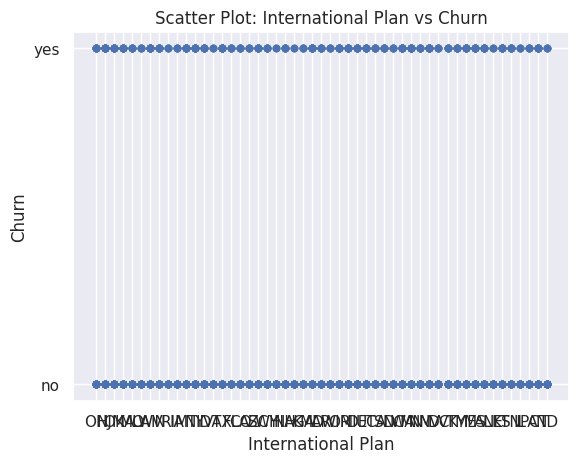

In [90]:
train_.plot.scatter(x='state', y='churn', title='Scatter Plot: International Plan vs Churn', xlabel='International Plan', ylabel='Churn', grid=True)

<Axes: title={'center': 'Total Dat Minutes Distribution'}, ylabel='Frequency'>

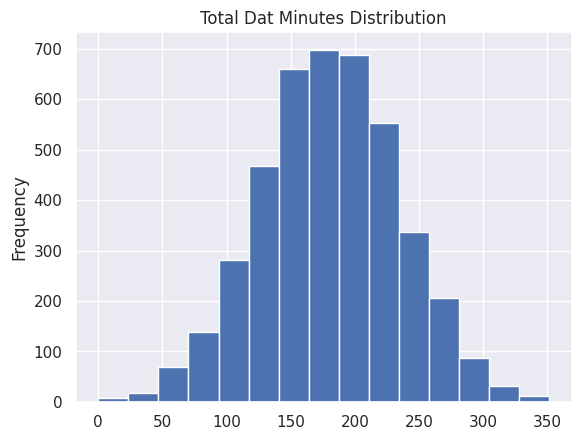

In [91]:
train_['total_day_minutes'].plot.hist(title='Total Dat Minutes Distribution', bins=15)

<Axes: title={'center': 'total_intl_charge'}, ylabel='churn'>

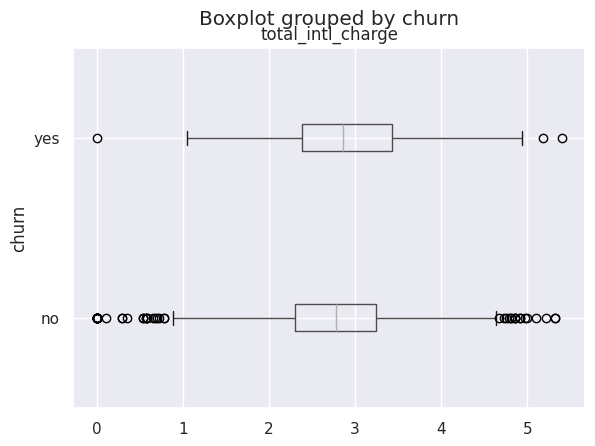

In [92]:
train_.boxplot(column='total_intl_charge', by='churn', grid=True, vert=False)

Lets do pair plots to see if there are any observations to help in model selection

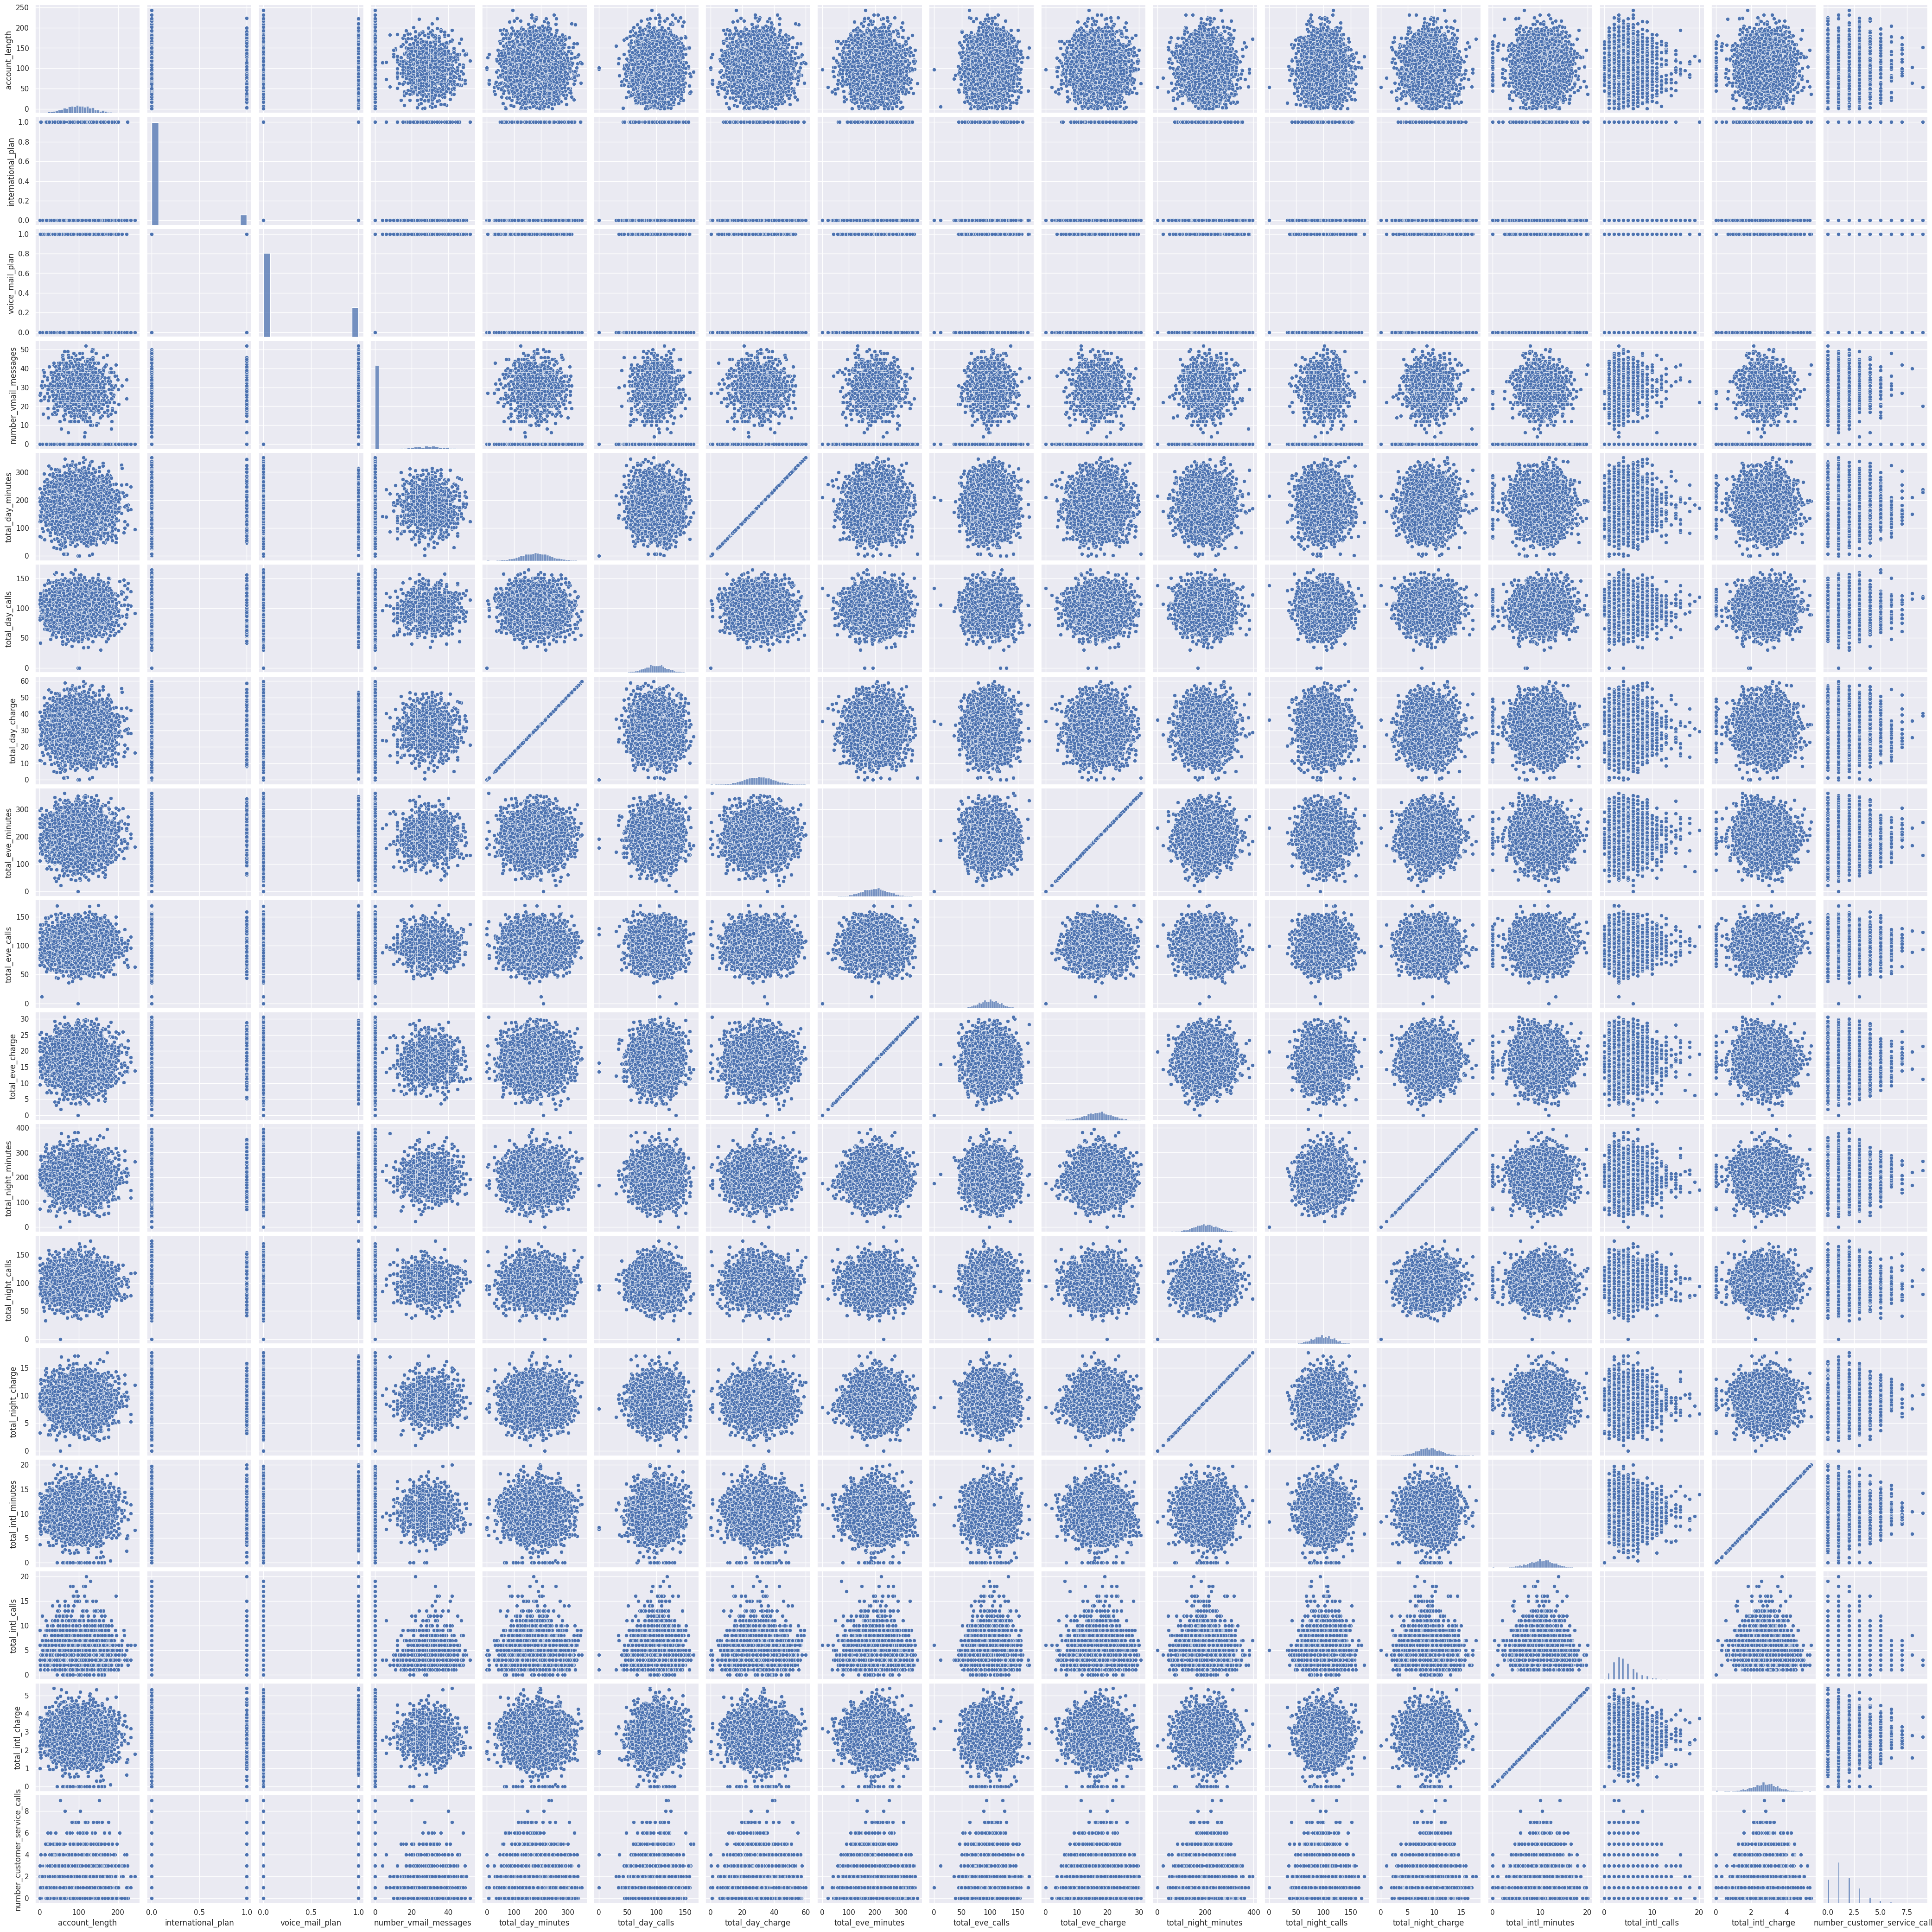

In [98]:
sns.pairplot(X_train)

### Observations
As we can see the data is pretty well distributed, with good even distribution of samples in churn for all the categories.
Now Lets use gridsearch to train LogisticRegression

# Lets first Try Logsitic Regression as this is a classification problem

In [93]:
clf = LogisticRegression(solver='liblinear')
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.5973333333333334
Precision Score : 0.2413793103448276
Recall Score : 0.024390243902439025
F1 Score : 0.04430379746835443


#### Lets try SVC

In [97]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = clf.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.5866666666666667
Precision Score : 0.3230769230769231
Recall Score : 0.07317073170731707
F1 Score : 0.11931818181818182
